<a href="https://colab.research.google.com/github/E-crls/Aulas_Panda/blob/main/Aula2_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd

In [10]:
#leitura dos arquivo
df1 = pd.read_excel("/dataset/Aracaju.xlsx")
df2 = pd.read_excel("/dataset/Fortaleza.xlsx")
df3 = pd.read_excel("/dataset/Natal.xlsx")
df4 = pd.read_excel("/dataset/Recife.xlsx")
df5 = pd.read_excel("/dataset/Salvador.xlsx")

In [11]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [12]:
#Juntando todas as planilhas
df = pd.concat([df1,df2,df3,df4,df5])

In [13]:
#amostra aleatória
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
85,Salvador,2019-01-01,16.88,1035,3
50,Recife,2019-01-01,7.24,983,4
94,Aracaju,2018-01-01,198.24,1521,9
212,Natal,2019-01-02,50.73,1037,3
74,Recife,2019-01-01,38.79,983,6


In [14]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [15]:
#alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [16]:
#Verificar quantos valores nulos existem nas linhas
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [17]:
#Substituindo os valores nulos pela média
#inplace substitui na memória, não é temporário
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [18]:
#Substituindo valores nulos por 0
df["Vendas"].fillna(0, inplace=True)

In [19]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [20]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [21]:
#Remover linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

##Criando colunas novas


In [22]:
#Criando a coluna receita que terá o valor das vendas * quantidade
df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [23]:
df["Receita/Vendas"] = df["Receita"]/df["Vendas"]
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [24]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [25]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [26]:
#Retornar as 3 linhas com maior receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [27]:
#Retornar as 3 linhas com menor receita
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [28]:
#Somatório das receitar por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [29]:
#Ordenando o conjunto de dados
#ascending = False -> do maior para o menor, com base na receita
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


#Trabalhando com Datas

In [30]:
#Transformndo a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [31]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [32]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [33]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [36]:
#Agrupamento por ano
#Extrai os anos de Data e faz um somatório da receita total de cada
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [37]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [38]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
160,Natal,2019-01-02,11.76,1034,1,11.76,1.0,2019
136,Recife,2019-03-02,39.09,982,4,156.36,4.0,2019
105,Fortaleza,2019-01-01,174.66,1004,1,174.66,1.0,2019
96,Natal,2019-01-02,42.94,1034,3,128.82,3.0,2019
180,Natal,2019-01-02,116.63,1035,2,233.26,2.0,2019


In [40]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
9,Salvador,2019-01-01,127.92,1036,1,127.92,1.0,2019,1,1
102,Recife,2019-01-01,96.50,982,7,675.50,7.0,2019,1,1
65,Fortaleza,2019-01-01,145.20,1005,2,290.40,2.0,2019,1,1
17,Natal,2018-02-18,276.00,854,3,828.00,3.0,2018,2,18
103,Natal,2019-01-02,191.60,1034,1,191.60,1.0,2019,1,2


In [41]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [43]:
#Calculando a diferença de dias
df["Diferenca_dias"] = df["Data"] - df["Data"].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,Diferenca_dias
152,Salvador,2019-01-02,20.07,1035,1,20.07,1.0,2019,1,2,366 days
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0,2019,1,2,366 days
98,Recife,2019-01-01,137.34,981,8,1098.72,8.0,2019,1,1,365 days
78,Recife,2019-01-01,238.73,980,3,716.19,3.0,2019,1,1,365 days
69,Salvador,2019-01-01,14.79,1035,1,14.79,1.0,2019,1,1,365 days


In [47]:
#Criando a coluna trimestre
df["trimestre_venda"] = df["Data"].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,Diferenca_dias,sementre_venda,trimestre_venda
5,Fortaleza,2019-01-01,37.30,1002,5,186.50,5.0,2019,1,1,365 days,1,1
87,Natal,2019-01-02,135.19,1034,2,270.38,2.0,2019,1,2,366 days,1,1
204,Natal,2019-01-02,151.41,1037,2,302.82,2.0,2019,1,2,366 days,1,1
74,Fortaleza,2019-01-01,163.09,1005,5,815.45,5.0,2019,1,1,365 days,1,1
89,Salvador,2019-01-01,17.46,1034,1,17.46,1.0,2019,1,1,365 days,1,1


In [49]:
#Filtrando as vendas de 2019 do mês de março
#retorna todos que estão em 2019 e no mês 3
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,Diferenca_dias,sementre_venda,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1,1


#Visualização de dados

In [51]:
#Enumera quais lojas, pelo ID, vendeu mais, do maior pro menos
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

In [ ]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

In [ ]:
#Gráfico de barras verticais
df["LojaID"].value_counts().plot.barh()

In [ ]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh()

In [ ]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [56]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [ ]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

In [ ]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [68]:
#Alterando o estilo
plt.style.use("ggplot")

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total produtos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

In [70]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [81]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

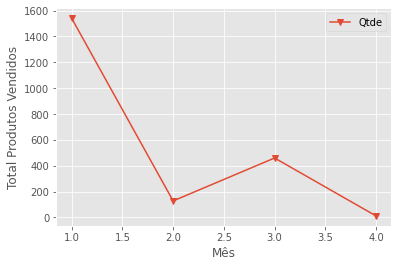

In [82]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

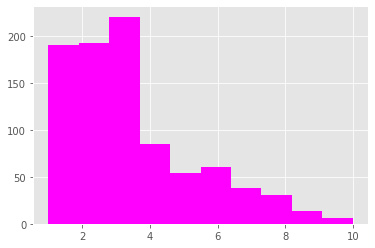

In [80]:
#Hisograma
plt.hist(df["Qtde"], color = "magenta");

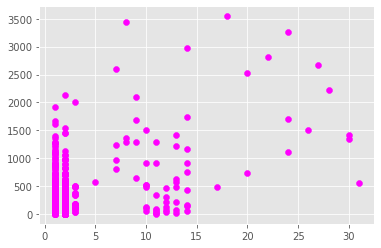

In [83]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"], color="magenta")

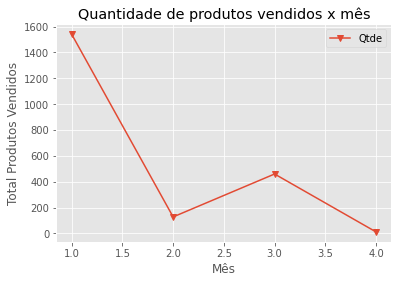

In [84]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")

In [ ]:
df.to_csv("/dataset/df_vendas_novo.csv", index=False)